In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from ase import Atoms
from ase.io import read
from ase import build
from ase.lattice.cubic import Diamond
from ase.lattice.hexagonal import Graphite
from ase.io import extxyz
from ase.io.extxyz import write_extxyz
from ase.io.extxyz import read_extxyz

from dscribe.descriptors import SOAP
from soap_package5 import  soap_desc

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
inputfile = "ext-structure_3.0gcm-3_10ps.xyz"
ref_inputfile = "diamond.xyz"
atoms = read(inputfile)
ref_atoms2 = Graphite("C",latticeconstant=(2.46, 6.71))
ref_atoms = Diamond("C")

In [71]:
atoms.set_pbc([False,False,False])
ref_atoms.set_pbc([False,False,False])
ref_atoms2.set_pbc([False,False,False])

In [6]:
desc_vera = soap_desc(atoms,rcut = 3.7,l_max = 10, n_max = 3,atom_sigma = 0.5)
ref_desc_vera = soap_desc(ref_atoms,rcut = 3.7,l_max = 10, n_max = 3,atom_sigma = 0.5)
#ref2_desc_vera = soap_desc(ref_atoms2,rcut = 3.7,l_max = 1, n_max = 2,atom_sigma = 0.5)

In [86]:
data_vera = []
for i in range(len(desc_vera)):
    data_vera.append(np.dot(desc_vera[i],ref_desc_vera[0]))

#data_vera2 = []

#for i in range(len(desc_vera)):
    #data_vera2.append(np.dot(desc_vera[i],ref2_desc_vera[0])**2)

In [89]:
desc = Descriptor("soap cutoff=3.7 l_max=10 n_max=3 atom_sigma=0.5")
test = desc.calc(atoms)
gap = test['data']

test1 = desc.calc(ref_atoms)
gap_ref= test1['data']

test2 = desc.calc(ref_atoms2)
gap_ref2= test2['data']

data_GAP=[]
for i in range(len(gap)):
    data_GAP.append(np.dot(gap[i][:-1],gap_ref[0][:-1]))

data_GAP2=[]
for i in range(len(gap)):
    data_GAP2.append(np.dot(gap[i][:-1],gap_ref2[0][:-1]))

In [90]:
soap = SOAP(species = ['C'],rcut=3.7, nmax=3, lmax=10, sigma=0.5, rbf='polynomial')
dscribe = soap.create(atoms)
for i in range(len(dscribe)):
    dscribe[i]=dscribe[i] / np.linalg.norm(dscribe[i])

dscribe1 = soap.create(ref_atoms)
for i in range(len(dscribe1)):
    dscribe1[i]=dscribe1[i] / np.linalg.norm(dscribe1[i])

dscribe2 = soap.create(ref_atoms2)
for i in range(len(dscribe2)):
    dscribe2[i]=dscribe2[i] / np.linalg.norm(dscribe2[i])

data_dscribe1 = []
for i in range(len(dscribe)):
    data_dscribe1.append(np.dot(dscribe[i],dscribe1[0]))

data_dscribe2 = []
for i in range(len(dscribe)):
    data_dscribe2.append(np.dot(dscribe[i],dscribe2[0]))

<function matplotlib.pyplot.show(close=None, block=None)>

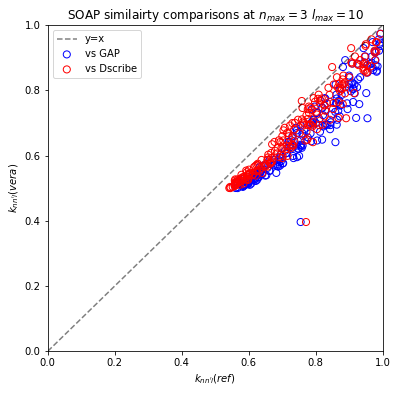

In [92]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_ylabel("$k_{pp'}(vera)$")
ax.set_xlabel("$k_{pp'}(ref)$")
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.plot([0,1],[0,1], "--", transform=ax.transAxes,label = "y=x", color = 'black', alpha = 0.5)

ax.scatter(data_GAP,data_vera, s = 50, marker = "o", facecolors='none', edgecolor = "blue",label = "vs GAP")
ax.scatter(data_dscribe1,data_vera, s = 50, marker = "o", facecolors='none', edgecolor = "red",label = "vs Dscribe")
plt.title("SOAP similairty comparisons at $n_{max} = 3\ l_{max} =10$")
plt.legend()
plt.show

In [96]:
data_vera = []
data_GAP = []
for i in range(1,11):
    desc_vera = soap_desc(atoms,rcut = 3.7,l_max = 3, n_max = i,atom_sigma = 0.5)
    ref_desc_vera = soap_desc(ref_atoms,rcut = 3.7,l_max = 3, n_max = i,atom_sigma = 0.5)
    desc_gap = Descriptor(f"soap cutoff=3.7, l_max=3, n_max={i}, atom_sigma=0.5")
    gap = desc_gap.calc(atoms)['data']
    ref_gap = desc_gap.calc(ref_atoms)['data']
    v =[]
    g =[]
    for j in range(len(desc_vera)):
        v.append(np.dot(desc_vera[j],ref_desc_vera[0]))
        g.append(np.dot(gap[j][:-1],ref_gap[0][:-1]))
    data_vera.append(np.array(v))
    data_GAP.append(np.array(g))


In [6]:
data_vera = []
data_dscribe = []
for i in range(1,11):
    desc_vera = soap_desc(atoms,rcut = 3.7,l_max = 1, n_max = i,atom_sigma = 0.5)
    ref_desc_vera = soap_desc(ref_atoms,rcut = 3.7,l_max = 1, n_max = i,atom_sigma = 0.5)
    desc_dscribe = SOAP(species = ['C'],rcut=3.7, nmax= i, lmax=1, sigma=0.5, rbf='polynomial')
    dscribe = desc_dscribe.create(atoms)
    ref_dscribe = desc_dscribe.create(ref_atoms)
    v =[]
    d = []
    for j in range(len(dscribe)):
        v.append(np.dot(desc_vera[j],ref_desc_vera[0]))
        dscribe[j]=dscribe[j] / np.linalg.norm(dscribe[j])
        ref_dscribe[0]=ref_dscribe[0] / np.linalg.norm(ref_dscribe[0])
        d.append(np.dot(dscribe[j],ref_dscribe[0]))
    data_vera.append(np.array(v))
    data_dscribe.append(np.array(d))

In [1]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_ylabel("$k_{pp'}(vera)$")
ax.set_xlabel("$k_{pp'}(GAP)$")
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)

data_label = []
ax.plot([0,1],[0,1], "--", transform=ax.transAxes,label = "y=x", color = 'black', alpha = 0.5)

for i in range(1,11):
    data_label.append("$n_{max} =$ " + str(i))

colors = cm.rainbow(np.linspace(0, 1, len(data_vera)))
for i in range(len(data_vera)):
    ax.scatter(data_GAP[i],data_vera[i], s = 50, marker = "o", facecolors='none', edgecolors= colors[i], label=data_label[i])

plt.title("SOAP similarities comparison of Vera vs GAP at different $n_{max}$ and constanct $l_{max}=3$")
ax.legend()
plt.show

NameError: name 'plt' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

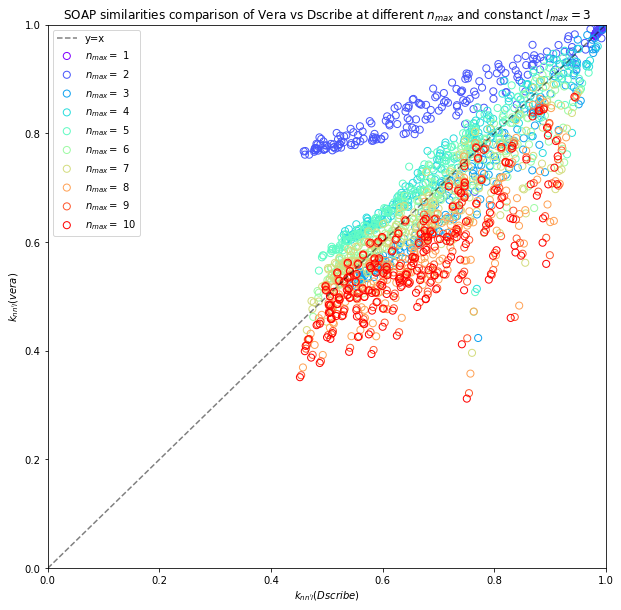

In [114]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_ylabel("$k_{pp'}(vera)$")
ax.set_xlabel("$k_{pp'}(Dscribe)$")
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)

data_label = []
ax.plot([0,1],[0,1], "--", transform=ax.transAxes,label = "y=x", color = 'black', alpha = 0.5)

for i in range(1,11):
    data_label.append("$n_{max} =$ " + str(i))

colors = cm.rainbow(np.linspace(0, 1, len(data_vera)))
for i in range(len(data_vera)):
    ax.scatter(data_dscribe[i],data_vera[i], s = 50, marker = "o", facecolors='none', edgecolors= colors[i], label=data_label[i])

plt.title("SOAP similarities comparison of Vera vs Dscribe at different $n_{max}$ and constanct $l_{max}=3$")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

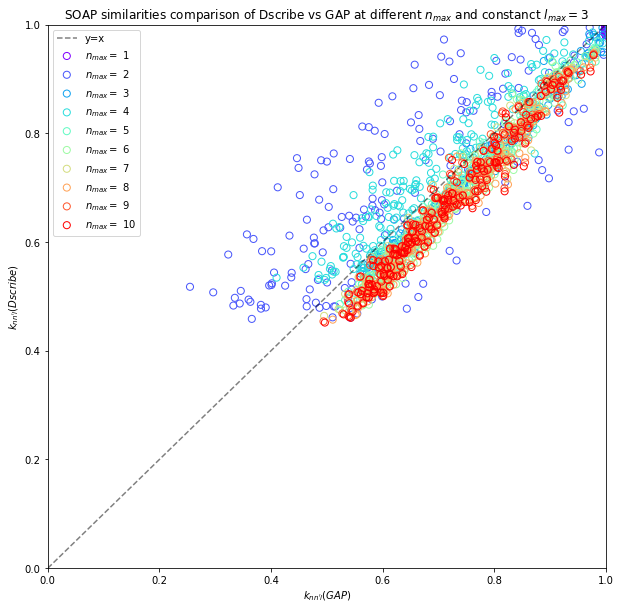

In [115]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_ylabel("$k_{pp'}(Dscribe)$")
ax.set_xlabel("$k_{pp'}(GAP)$")
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)

data_label = []
ax.plot([0,1],[0,1], "--", transform=ax.transAxes,label = "y=x", color = 'black', alpha = 0.5)

for i in range(1,11):
    data_label.append("$n_{max} =$ " + str(i))

colors = cm.rainbow(np.linspace(0, 1, len(data_vera)))
for i in range(len(data_vera)):
    ax.scatter(data_GAP[i],data_dscribe[i], s = 50, marker = "o", facecolors='none', edgecolors= colors[i], label=data_label[i])

plt.title("SOAP similarities comparison of Dscribe vs GAP at different $n_{max}$ and constanct $l_{max}=3$")

ax.legend()
plt.show